In [0]:
!unzip covid19-in-india.zip

Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


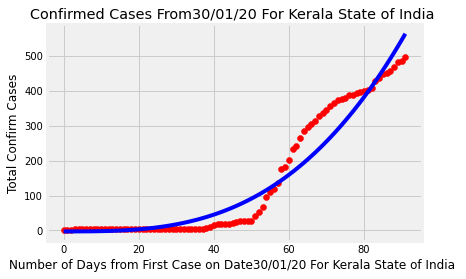

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


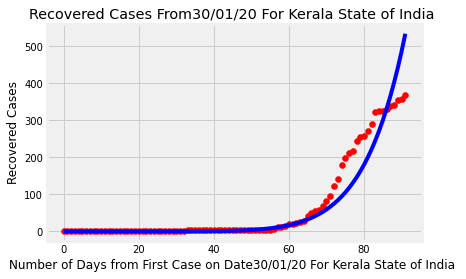

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


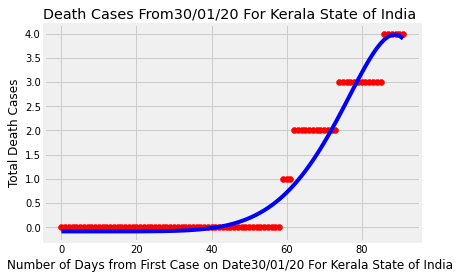

212.31452477218295


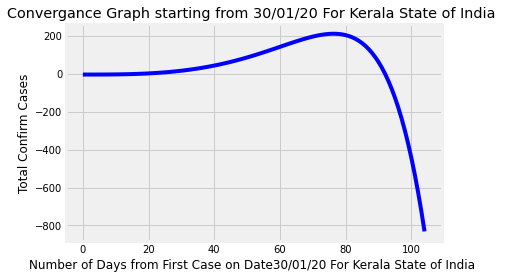

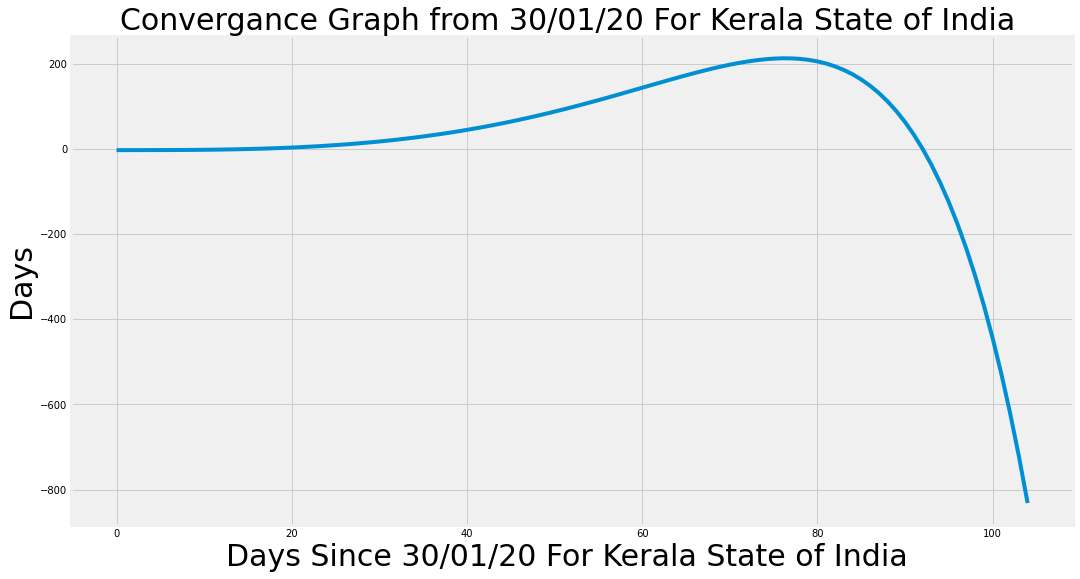

,Date,Predicted Number of Confirmed Cases
0,2020-05-01,582.428111
1,2020-05-02,601.723563
2,2020-05-03,621.438465
3,2020-05-04,641.577328
4,2020-05-05,662.144660
5,2020-05-06,683.144974
6,2020-05-07,704.582778
7,2020-05-08,726.462583
8,2020-05-09,748.788900
9,2020-05-10,771.566238


In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import pandas as pd

plt.style.use('fivethirtyeight')
%matplotlib inline




coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

input = 'Kerala'

newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]

recover = newdata1['Cured']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input+" State of India "
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']

y = pd.DataFrame(confirmed)

X = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X, y)

plt.scatter(X, y, color = 'red')

t = pd.DataFrame(range(len(X)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, confirmed_model.predict(t), color = 'blue')
plt.title('Confirmed Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()
n = len(X)
t10 = pd.DataFrame({"Date" : range(n, n + 10)})

import pandas as pd
from datetime import datetime
t1 = pd.DataFrame({"Date" : pd.date_range(start="2020-05-01",end="2020-05-10")})

t1['Predicted Number of Confirmed Cases'] = pd.DataFrame(confirmed_model.predict(t10))




X["data"] = confirmed_model.predict(X)

y = pd.DataFrame(recover)
svr_rbf3 = SVR(kernel='poly', degree=3)
recover_model = svr_rbf3.fit(X, y)

data = recover_model.predict(X)



plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, recover_model.predict(X), color = 'blue')
plt.title('Recovered Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Recovered Cases')
plt.show()









coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])
coviddata.tail(10)

newdata1 = coviddata[coviddata['State/UnionTerritory'] == 'Kerala']
recover = newdata1['Cured']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']


svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']
y = pd.DataFrame(confirmed)

X1 = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X1, y)


X1["data"] = confirmed_model.predict(X1)

y = pd.DataFrame(death)

svr_rbf3 = SVR(kernel='poly', degree=3)

death_model = svr_rbf3.fit(X1, y)

data = death_model.predict(X1)



t = pd.DataFrame(range(len(X1)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, death_model.predict(X1), color = 'blue')
plt.title('Death Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Death Cases')
plt.show()



X11 = pd.DataFrame(range(len(confirmed) + 13))

y = confirmed_model.predict(X11)

X11["data"] = y

yy = recover_model.predict(X11)

# print(X11)

X22 = pd.DataFrame(range(len(confirmed) + 13))

X22["data"] = y

yyy = death_model.predict(X11)


# print(y)

# print(yy)

# print(yyy)

d = []

(y - (yy - yyy))

  
  
data = (y - (yy - yyy))

print(max(data))
t = pd.DataFrame(range(len(y)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, data, color = 'blue')
plt.title('Convergance Graph starting from '+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()



plt.figure(figsize=(16, 9))
plt.plot(t, data)
plt.title('Convergance Graph from '+date, size=30)
plt.xlabel('Days Since '+date , size=30)
plt.ylabel('Days', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

t1
t1

None


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


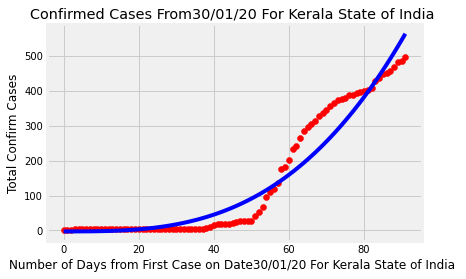

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


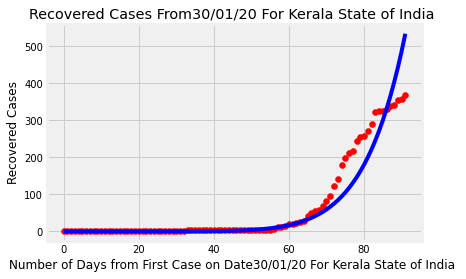

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


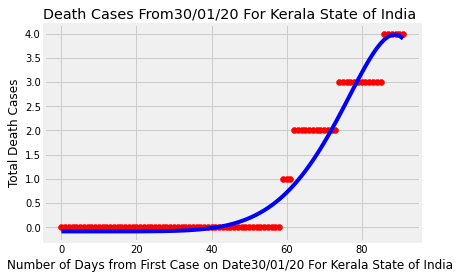

212.31452477218295


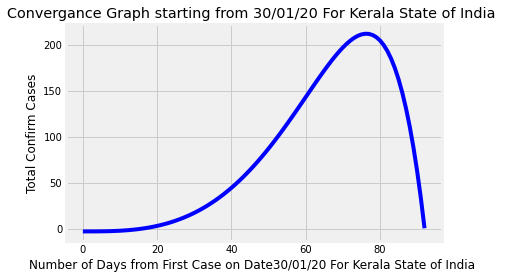

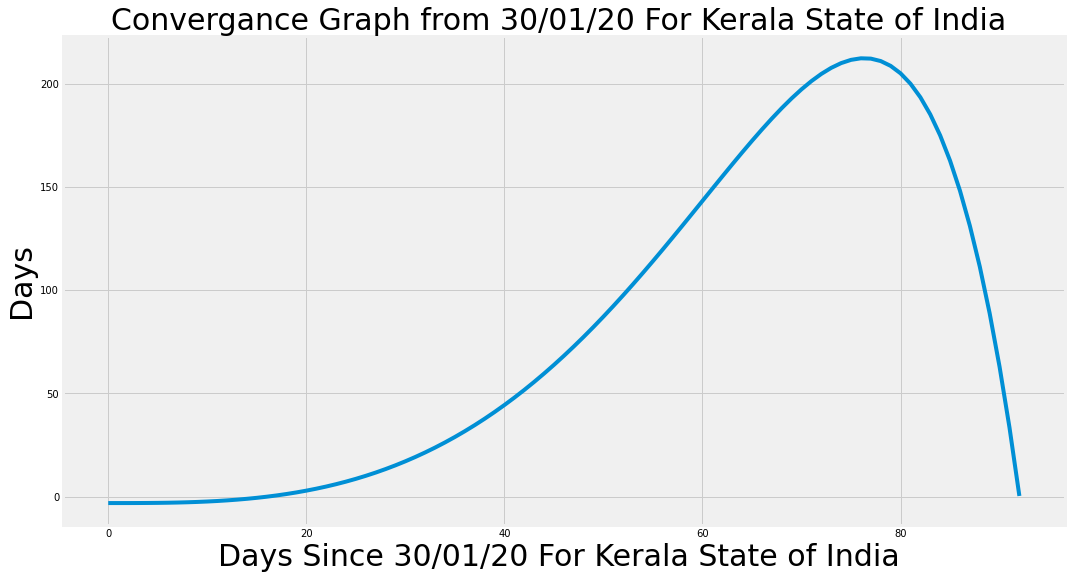

In [0]:
coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

input = 'Kerala'

newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]
recover = newdata1['Cured']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input+" State of India "
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']

y = pd.DataFrame(confirmed)

X = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X, y)

plt.scatter(X, y, color = 'red')

t = pd.DataFrame(range(len(X)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, confirmed_model.predict(t), color = 'blue')
plt.title('Confirmed Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()




X["data"] = confirmed_model.predict(X)

y = pd.DataFrame(recover)
svr_rbf3 = SVR(kernel='poly', degree=3)
recover_model = svr_rbf3.fit(X, y)

data = recover_model.predict(X)



t = pd.DataFrame(range(len(X)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, recover_model.predict(X), color = 'blue')
plt.title('Recovered Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Recovered Cases')
plt.show()









coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])
coviddata.tail(10)

newdata1 = coviddata[coviddata['State/UnionTerritory'] == 'Kerala']
recover = newdata1['Cured']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']


svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']
y = pd.DataFrame(confirmed)

X1 = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X1, y)


X1["data"] = confirmed_model.predict(X1)

y = pd.DataFrame(death)

svr_rbf3 = SVR(kernel='poly', degree=3)

death_model = svr_rbf3.fit(X1, y)

data = death_model.predict(X1)



t = pd.DataFrame(range(len(X1)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, death_model.predict(X1), color = 'blue')
plt.title('Death Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Death Cases')
plt.show()



X11 = pd.DataFrame(range(len(confirmed) + 1))

y = confirmed_model.predict(X11)

X11["data"] = y

yy = recover_model.predict(X11)

# print(X11)

X22 = pd.DataFrame(range(len(confirmed) + 1))

X22["data"] = y

yyy = death_model.predict(X11)


# print(y)

# print(yy)

# print(yyy)

d = []

(y - (yy - yyy))

  
  
data = (y - (yy - yyy))

print(max(data))

t = pd.DataFrame(range(len(y)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, data, color = 'blue')
plt.title('Convergance Graph starting from '+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()



plt.figure(figsize=(16, 9))
plt.plot(t, data)
plt.title('Convergance Graph from '+date, size=30)
plt.xlabel('Days Since '+date , size=30)
plt.ylabel('Days', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


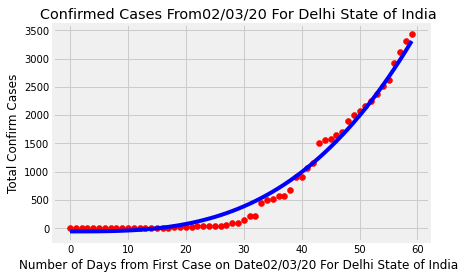

In [0]:
coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

input = 'Delhi'

newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]
recover = newdata1['Cured']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input+" State of India "
start_date = 'Number of Days from First Case on Date'+date
svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']

y = pd.DataFrame(confirmed)

X = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X, y)

plt.scatter(X, y, color = 'red')

t = pd.DataFrame(range(len(X)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, confirmed_model.predict(t), color = 'blue')
plt.title('Confirmed Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()


In [0]:
dat1 = [] 
recover = np.array(recover)
for i in range(1,len(recover)) :
  dat1.append(recover[i] - recover[i - 1])

dat2 = [] 
death = np.array(death)
for i in range(1,len(death)) :
  dat2.append(death[i] - death[i - 1])

dat3 = [] 
confirmed = np.array(confirmed)
for i in range(1,len(confirmed)) :
  dat3.append(confirmed[i] - confirmed[i - 1])


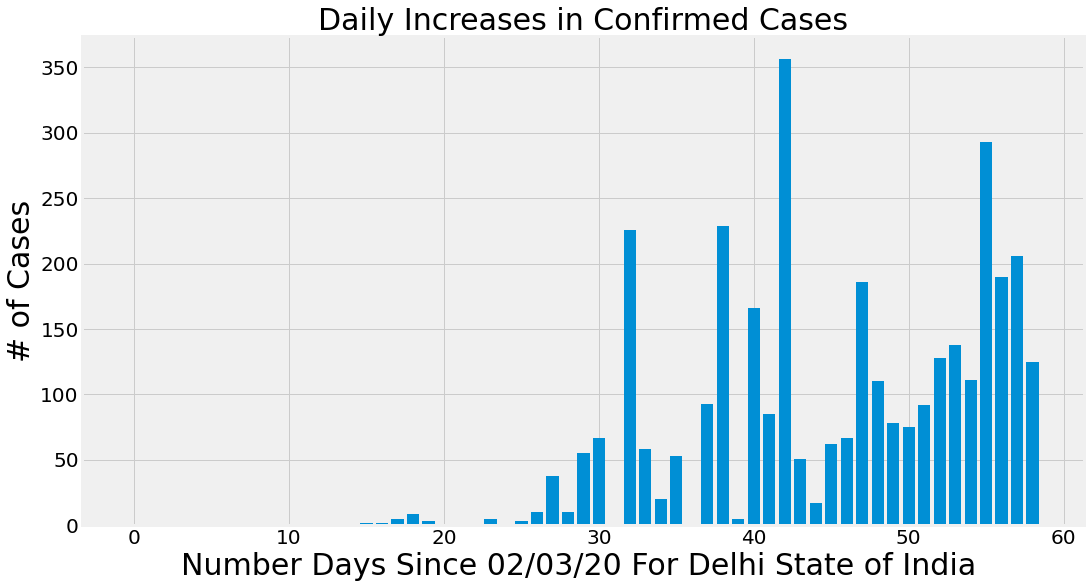

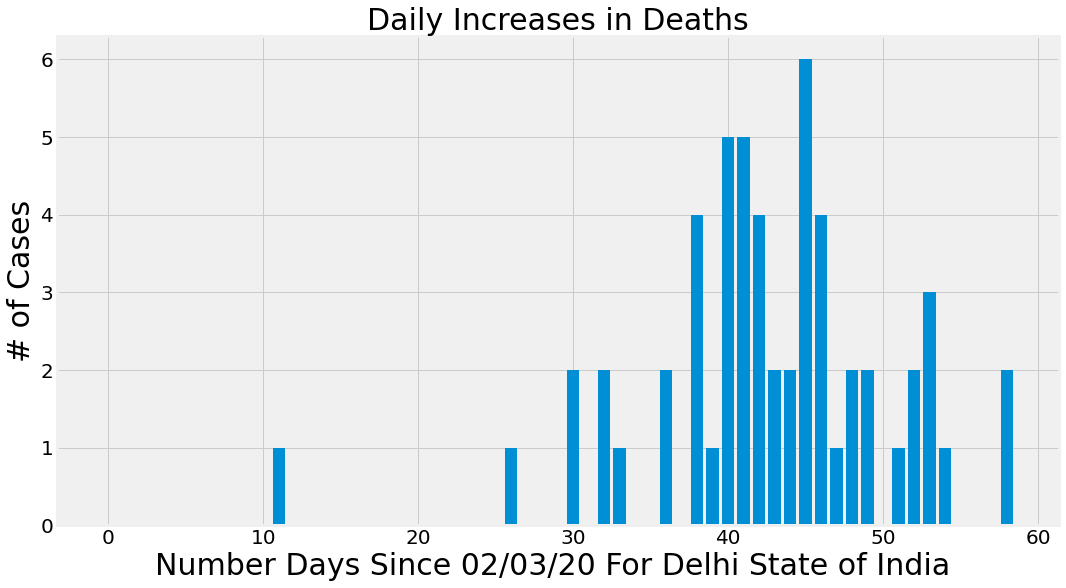

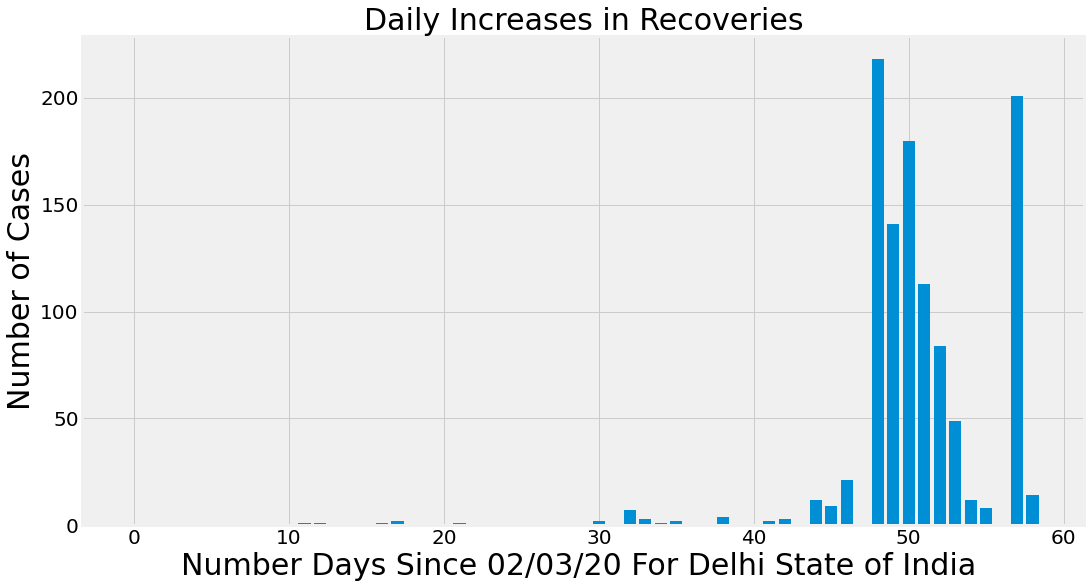

In [0]:
    plt.figure(figsize=(16, 9))
    plt.bar(range(len(dat3)), dat3)
    plt.title('Daily Increases in Confirmed Cases', size=30)
    plt.xlabel('Number Days Since '+date, size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(range(len(dat2)), dat2)
    plt.title('Daily Increases in Deaths', size=30)
    plt.xlabel('Number Days Since '+date, size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.bar(range(len(dat1)), dat1)
    plt.title('Daily Increases in Recoveries', size=30)
    plt.xlabel('Number Days Since '+date, size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [0]:
input = 'Delhi'

dl = coviddata[coviddata['State/UnionTerritory'] == input]
# print(coviddata.tail(20))

dl_Confirmed = dl['Confirmed']

dl_size = len(dl)

input = 'Kerala'

kl = coviddata[coviddata['State/UnionTerritory'] == input]

kl_Confirmed = kl['Confirmed']

kl_size = len(kl)

input = 'Maharashtra'

mh = coviddata[coviddata['State/UnionTerritory'] == input]

mh_Confirmed = mh['Confirmed']

mh_size = len(mh)

input = 'Madhya Pradesh'

mp = coviddata[coviddata['State/UnionTerritory'] == input]

mp_Confirmed = mp['Confirmed']

mp_size = len(mp)


list1 = [dl_size, kl_size, mh_size, mp_size]
list2 = [dl_Confirmed, kl_Confirmed, mh_Confirmed, mp_Confirmed]

m = max(list1)
print(m)
datas = range(m)


for i in range(len(list1)):
  list2[i] = np.hstack((np.zeros(m - len(list2[i])), list2[i]))
  print(list2[i])



92
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 1.000e+00 1.000e+00
 2.000e+00 3.000e+00 3.000e+00 3.000e+00 4.000e+00 4.000e+00 5.000e+00
 6.000e+00 6.000e+00 7.000e+00 7.000e+00 7.000e+00 8.000e+00 1.000e+01
 1.200e+01 1.700e+01 2.600e+01 2.900e+01 2.900e+01 3.000e+01 3.100e+01
 3.600e+01 3.600e+01 3.900e+01 4.900e+01 8.700e+01 9.700e+01 1.520e+02
 2.190e+02 2.190e+02 4.450e+02 5.030e+02 5.230e+02 5.760e+02 5.760e+02
 6.690e+02 8.980e+02 9.030e+02 1.069e+03 1.154e+03 1.510e+03 1.561e+03
 1.578e+03 1.640e+03 1.707e+03 1.893e+03 2.003e+03 2.081e+03 2.156e+03
 2.248e+03 2.376e+03 2.514e+03 2.625e+03 2.918e+03 3.108e+03 3.314e+03
 3.439e+03]
[  1.   1.   2.   3.   3.   3.   3.   3.   3.   3.   3.   3.  

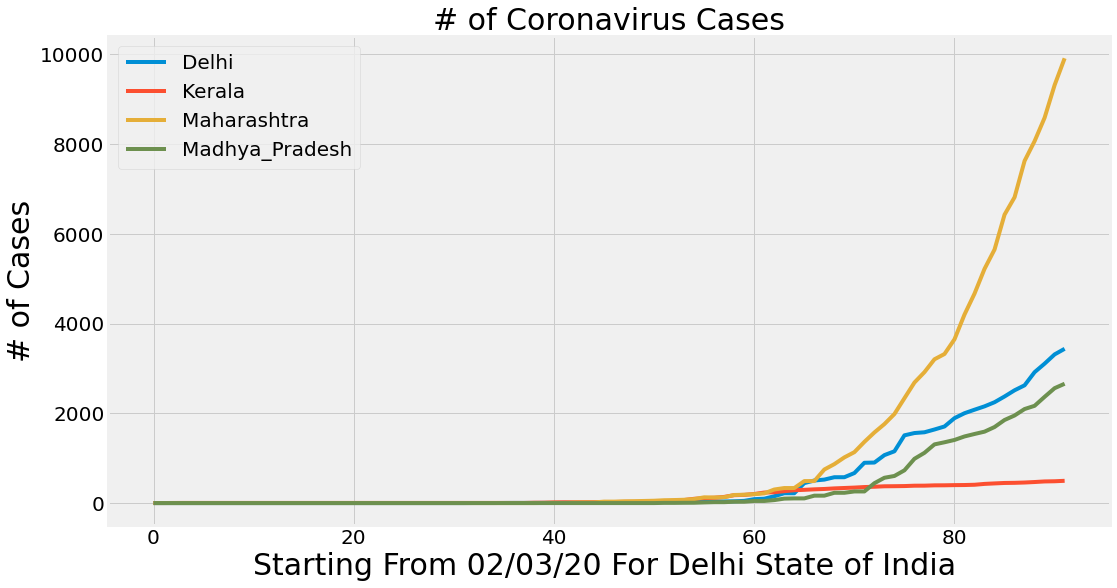

In [0]:
plt.figure(figsize=(16, 9))
plt.plot(datas, list2[0])
plt.plot(datas, list2[1])
plt.plot(datas, list2[2])
plt.plot(datas, list2[3])
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Starting From '+date, size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Delhi', 'Kerala', 'Maharashtra', 'Madhya_Pradesh'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [0]:
coviddata

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1
2,01/02/20,6:00 PM,Kerala,0,0,2
3,02/02/20,6:00 PM,Kerala,0,0,3
4,03/02/20,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
1473,30/04/20,5:00 PM,Telengana,367,26,1012
1474,30/04/20,5:00 PM,Tripura,2,0,2
1475,30/04/20,5:00 PM,Uttarakhand,36,0,55
1476,30/04/20,5:00 PM,Uttar Pradesh,513,39,2203


In [0]:
!unzip covid-19-master.zip

unzip:  cannot find or open covid-19-master.zip, covid-19-master.zip.zip or covid-19-master.zip.ZIP.


In [0]:
cdata = pd.read_csv("/content/covid-19-master/data/countries-aggregated.csv")
india = cdata[cdata['Country'] == 'India']
china = cdata[cdata['Country'] == 'US']
print(india.head(10))
print(china.head(10))
print(india.size)
print(china.size)

            Date Country  Confirmed  Recovered  Deaths
79    2020-01-22   India          0          0       0
266   2020-01-23   India          0          0       0
453   2020-01-24   India          0          0       0
640   2020-01-25   India          0          0       0
827   2020-01-26   India          0          0       0
1014  2020-01-27   India          0          0       0
1201  2020-01-28   India          0          0       0
1388  2020-01-29   India          0          0       0
1575  2020-01-30   India          1          0       0
1762  2020-01-31   India          1          0       0
            Date Country  Confirmed  Recovered  Deaths
173   2020-01-22      US          1          0       0
360   2020-01-23      US          1          0       0
547   2020-01-24      US          2          0       0
734   2020-01-25      US          2          0       0
921   2020-01-26      US          5          0       0
1108  2020-01-27      US          5          0       0
1295  2020

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


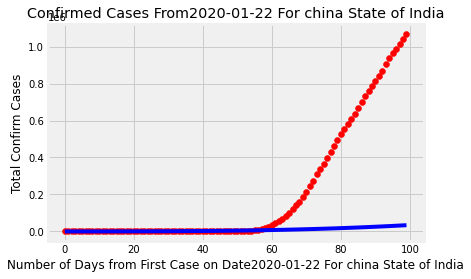

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


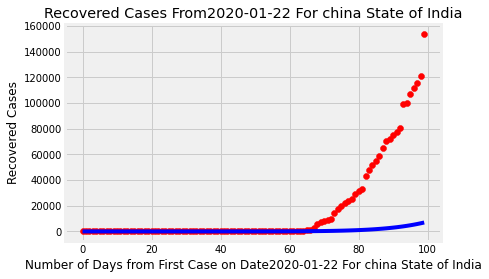

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


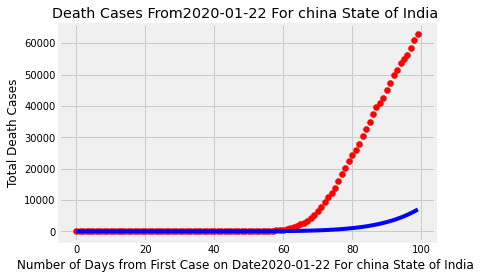

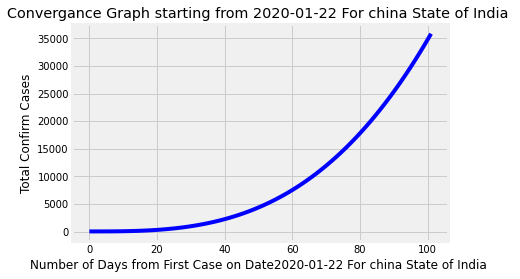

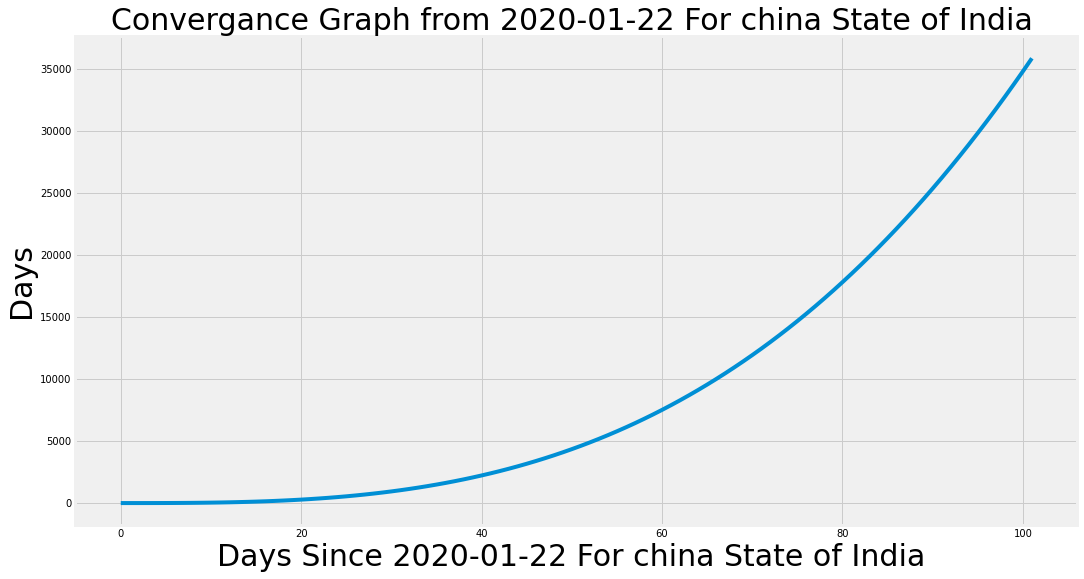

In [0]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import xgboost
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
import pandas as pd

plt.style.use('fivethirtyeight')
%matplotlib inline




# coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

# input = 'Delhi'

# newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]

input = 'china'
newdata1 = china
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input+" State of India"
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']

y = pd.DataFrame(confirmed)

X = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X, y)

plt.scatter(X, y, color = 'red')

t = pd.DataFrame(range(len(X)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, confirmed_model.predict(t), color = 'blue')
plt.title('Confirmed Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()




X["data"] = confirmed_model.predict(X)

y = pd.DataFrame(recover)
svr_rbf3 = SVR(kernel='poly', degree=3)
recover_model = svr_rbf3.fit(X, y)

data = recover_model.predict(X)



t = pd.DataFrame(range(len(X)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, recover_model.predict(X), color = 'blue')
plt.title('Recovered Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Recovered Cases')
plt.show()









# coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])
# coviddata.tail(10)

# newdata1 = coviddata[coviddata['State/UnionTerritory'] == 'Delhi']
newdata1 = china
recover = newdata1['Recovered']
death = newdata1['Deaths']
confirmed = newdata1['Confirmed']
date = np.array(newdata1['Date'])[0]+" For "+input+" State of India "
start_date = 'Number of Days from First Case on Date'+date

svr_rbf3 = SVR(kernel='poly', degree=3)

lw = 2

model_color = ['m', 'c', 'g']
y = pd.DataFrame(confirmed)

X1 = pd.DataFrame(range(len(confirmed)))


confirmed_model = svr_rbf3.fit(X1, y)


X1["data"] = confirmed_model.predict(X1)

y = pd.DataFrame(death)

svr_rbf3 = SVR(kernel='poly', degree=3)

death_model = svr_rbf3.fit(X1, y)

data = death_model.predict(X1)



t = pd.DataFrame(range(len(X1)))

plt.scatter(t, y, color = 'red')

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, death_model.predict(X1), color = 'blue')
plt.title('Death Cases From'+date)
plt.xlabel(start_date)
plt.ylabel('Total Death Cases')
plt.show()



X11 = pd.DataFrame(range(len(confirmed) + 2))

y = confirmed_model.predict(X11)

X11["data"] = y

yy = recover_model.predict(X11)

# print(X11)

X22 = pd.DataFrame(range(len(confirmed) + 2))

X22["data"] = y

yyy = death_model.predict(X11)


# print(y)

# print(yy)

# print(yyy)

d = []

(y - (yy - yyy))

  
  
data = (y - (yy - yyy))

t = pd.DataFrame(range(len(y)))

X_grid = np.arange(min(t), max(t), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.plot(t, data, color = 'blue')
plt.title('Convergance Graph starting from '+date)
plt.xlabel(start_date)
plt.ylabel('Total Confirm Cases')
plt.show()



plt.figure(figsize=(16, 9))
plt.plot(t, data)
plt.title('Convergance Graph from '+date, size=30)
plt.xlabel('Days Since '+date , size=30)
plt.ylabel('Days', size=30)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [0]:
coviddata = pd.read_csv("covid_19_india.csv", usecols = ['Date', 'Time', 'State/UnionTerritory',	'Cured',	'Deaths',	'Confirmed'])

input = 'Kerala'

newdata1 = coviddata[coviddata['State/UnionTerritory'] == input]

In [0]:
print(newdata1.shape)
newdata1

(92, 6)


,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,0,0,1
1,31/01/20,6:00 PM,Kerala,0,0,1
2,01/02/20,6:00 PM,Kerala,0,0,2
3,02/02/20,6:00 PM,Kerala,0,0,3
4,03/02/20,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...
1333,26/04/20,5:00 PM,Kerala,338,4,458
1365,27/04/20,5:00 PM,Kerala,342,4,469
1397,28/04/20,5:00 PM,Kerala,355,4,482
1429,29/04/20,5:00 PM,Kerala,359,4,486
